In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from IPython.display import display

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [ ]:
### -- !!!Only Run for the first time to install seaborn!!! -- ##
# %pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
### -- !!!Only Run for the first time to install statsmodels --- ### 
# %pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 15.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [ ]:

df = pd.read_csv("archive/DataCoSupplyChainDataset.csv", encoding='latin1')

In [ ]:
# Standardize column names to snake_case for easier referencing later
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^0-9a-z]+', '_', regex=True)
      .str.strip('_')
)
df.columns[:10]

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order', 'sales_per_customer', 'delivery_status', 'late_delivery_risk', 'category_id', 'category_name',
       'customer_city'],
      dtype='object')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# Inspect structure
print(df.shape)
print(df.head())
print(df.info())

(180519, 53)
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73 

In [10]:
# List columns and show a few sample rows to inspect
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(df.shape)
df.head().T

(180519, 58)


,0,1,2,3,4
Type,DEBIT,TRANSFER,CASH,DEBIT,PAYMENT
Days for shipping (real),3,5,4,3,2
Days for shipment (scheduled),4,4,4,4,4
Benefit per order,91.25,-249.089996,-247.779999,22.860001,134.210007
Sales per customer,314.640015,311.359985,309.720001,304.809998,298.25
Delivery Status,Advance shipping,Late delivery,Shipping on time,Advance shipping,Advance shipping
Late_delivery_risk,0,1,0,0,0
Category Id,73,73,73,73,73
Category Name,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods,Sporting Goods
Customer City,Caguas,Caguas,San Jose,Los Angeles,Caguas


In [41]:
# Dropping heavily sensitive/ppintless cols
cols_to_drop = [
    'customer_email', 'customer_password', 'customer_fname',
    'product_image', 'product_description', 'product_status'
]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [42]:
# --- Date parsing, engineered features, and targets for delay prediction ---
date_aliases = {
    'order_date': ['order_date_dateorders', 'order_date'],
    'shipping_date': ['shipping_date_dateorders', 'shipping_date']
}
for canonical, candidates in date_aliases.items():
    df[canonical] = pd.NaT
    matched_col = None
    for candidate in candidates:
        if candidate in df.columns:
            df[canonical] = pd.to_datetime(df[candidate], errors='coerce')
            matched_col = candidate
            break
    if matched_col is None:
        print(f"Warning: no source column found for {canonical}")
    else:
        print(f"Derived {canonical} from '{matched_col}'")

# Month indicator (categorical) from order_date
if df['order_date'].notna().any():
    df['order_month'] = df['order_date'].dt.to_period('M').astype(str)
else:
    df['order_month'] = np.nan

# Shipping lead-time variance: actual vs scheduled shipping days
if {'days_for_shipping_real', 'days_for_shipment_scheduled'}.issubset(df.columns):
    df['shipping_lead_time_variance'] = (
        df['days_for_shipping_real'] - df['days_for_shipment_scheduled']
    )
else:
    df['shipping_lead_time_variance'] = np.nan

# Order processing time in days: order -> shipping
df['order_processing_time'] = (df['shipping_date'] - df['order_date']).dt.days

# Regression target: delay_days (non-negative)
if {'days_for_shipping_real', 'days_for_shipment_scheduled'}.issubset(df.columns):
    df['delay_days'] = (
        df['days_for_shipping_real'] - df['days_for_shipment_scheduled']
    ).clip(lower=0)
else:
    df['delay_days'] = np.nan

# Classification target: late vs on-time
if 'late_delivery_risk' in df.columns:
    df['late_target'] = df['late_delivery_risk'].astype(int)
else:
    df['late_target'] = (df['delay_days'] > 0).astype(int)

df[['days_for_shipment_scheduled', 'days_for_shipping_real',
    'shipping_lead_time_variance', 'order_processing_time',
    'order_month', 'delay_days', 'late_target']].head()

Derived order_date from 'order_date_dateorders'
Derived shipping_date from 'shipping_date_dateorders'
Derived shipping_date from 'shipping_date_dateorders'


,days_for_shipment_scheduled,days_for_shipping_real,shipping_lead_time_variance,order_processing_time,order_month,delay_days,late_target
0,4,3,-1,3,2018-01,0,0
1,4,5,1,5,2018-01,1,1
2,4,4,0,4,2018-01,0,0
3,4,3,-1,3,2018-01,0,0
4,4,2,-2,2,2018-01,0,0


In [43]:
# --- Keep the 10 selected features + engineered features + targets ---
raw_feature_cols = [
    'days_for_shipment_scheduled',
    'days_for_shipping_real',
    'delivery_status',
    'shipping_mode',
    'order_region',
    'customer_country',
    'order_item_quantity',
    'sales',
    'order_date',
    'shipping_date',
]
engineered_feature_cols = [
    'shipping_lead_time_variance',
    'order_processing_time',
    'order_month',
]
target_cols = ['late_target', 'delay_days']

all_needed_cols = raw_feature_cols + engineered_feature_cols + target_cols
missing_cols = [col for col in all_needed_cols if col not in df.columns]
if missing_cols:
    print("Warning: missing columns:", missing_cols)

available_cols = [col for col in all_needed_cols if col in df.columns]
df_model = df[available_cols].copy()
print("df_model shape:", df_model.shape)
df_model.head().T

df_model shape: (180519, 15)


,0,1,2,3,4
days_for_shipment_scheduled,4,4,4,4,4
days_for_shipping_real,3,5,4,3,2
delivery_status,Advance shipping,Late delivery,Shipping on time,Advance shipping,Advance shipping
shipping_mode,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class
order_region,Southeast Asia,South Asia,South Asia,Oceania,Oceania
customer_country,Puerto Rico,Puerto Rico,EE. UU.,EE. UU.,Puerto Rico
order_item_quantity,1,1,1,1,1
sales,327.75,327.75,327.75,327.75,327.75
order_date,2018-01-31 22:56:00,2018-01-13 12:27:00,2018-01-13 12:06:00,2018-01-13 11:45:00,2018-01-13 11:24:00
shipping_date,2018-02-03 22:56:00,2018-01-18 12:27:00,2018-01-17 12:06:00,2018-01-16 11:45:00,2018-01-15 11:24:00


In [44]:
# --- 3.3 Descriptive statistics & missingness overview ---
numeric_cols = [
    'days_for_shipment_scheduled',
    'days_for_shipping_real',
    'shipping_lead_time_variance',
    'order_processing_time',
    'order_item_quantity',
    'sales',
    'delay_days',
]
numeric_cols = [col for col in numeric_cols if col in df_model.columns]

cat_cols = [
    'delivery_status',
    'shipping_mode',
    'order_region',
    'customer_country',
    'order_month',
]
cat_cols = [col for col in cat_cols if col in df_model.columns]

summary_table = (
    df_model[numeric_cols]
    .describe(percentiles=[0.25, 0.5, 0.75])
    .T
    .assign(missing_pct=100 * (1 - df_model[numeric_cols].count() / len(df_model)))
)
print("Numeric feature summary (rows = features):")
display(summary_table.round(2))

missing_pct = (df_model.isna().mean() * 100).round(2).sort_values(ascending=False)
print("\nTop 15 missingness percentages (including engineered features):")
display(missing_pct.head(15))

for col in cat_cols:
    print(f"\nTop categories for {col} (including NaNs):")
    display(df_model[col].value_counts(dropna=False).head(10))

Numeric feature summary (rows = features):


,count,mean,std,min,25%,50%,75%,max,missing_pct
days_for_shipment_scheduled,180519.0,2.93,1.37,0.00,2.00,4.00,4.00,4.00,0.0
days_for_shipping_real,180519.0,3.50,1.62,0.00,2.00,3.00,5.00,6.00,0.0
shipping_lead_time_variance,180519.0,0.57,1.49,-2.00,0.00,1.00,1.00,4.00,0.0
order_processing_time,180519.0,3.47,1.67,0.00,2.00,3.00,5.00,6.00,0.0
order_item_quantity,180519.0,2.13,1.45,1.00,1.00,1.00,3.00,5.00,0.0
sales,180519.0,203.77,132.27,9.99,119.98,199.92,299.95,1999.99,0.0
delay_days,180519.0,0.93,1.04,0.00,0.00,1.00,1.00,4.00,0.0



Top 15 missingness percentages (including engineered features):


days_for_shipment_scheduled    0.0
days_for_shipping_real         0.0
delivery_status                0.0
shipping_mode                  0.0
order_region                   0.0
customer_country               0.0
order_item_quantity            0.0
sales                          0.0
order_date                     0.0
shipping_date                  0.0
shipping_lead_time_variance    0.0
order_processing_time          0.0
order_month                    0.0
late_target                    0.0
delay_days                     0.0
dtype: float64


Top categories for delivery_status (including NaNs):


delivery_status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


Top categories for shipping_mode (including NaNs):


shipping_mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64


Top categories for order_region (including NaNs):


order_region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Name: count, dtype: int64


Top categories for customer_country (including NaNs):


customer_country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64


Top categories for order_month (including NaNs):


order_month
2016-10    5398
2015-12    5371
2015-03    5362
2015-05    5357
2017-03    5347
2016-08    5334
2015-01    5322
2017-07    5318
2017-05    5317
2016-01    5317
Name: count, dtype: int64

/tmp/ipykernel_29132/3725733796.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['delay_days']


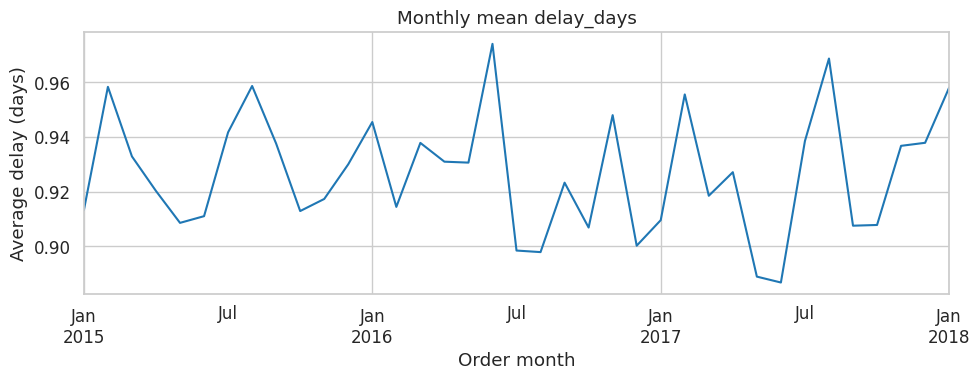

ADF statistic: -1.188
p-value: 0.6789
Critical values:
    1%: -3.689
    5%: -2.972
    10%: -2.625
Series appears non-stationary (fails to reject unit root). Consider differencing.


In [45]:
# --- Stationarity diagnostic for monthly average delay ---
monthly_delay = (
    df_model.dropna(subset=['order_date'])
            .set_index('order_date')
            .resample('M')['delay_days']
            .mean()
            .dropna()
)

fig, ax = plt.subplots(figsize=(10, 4))
monthly_delay.plot(ax=ax, color='#1f77b4')
ax.set_title('Monthly mean delay_days')
ax.set_ylabel('Average delay (days)')
ax.set_xlabel('Order month')
plt.tight_layout()
plt.show()

adf_stat, adf_pvalue, used_lags, n_obs, crit_vals, icbest = adfuller(monthly_delay)
print(f"ADF statistic: {adf_stat:.3f}")
print(f"p-value: {adf_pvalue:.4f}")
print("Critical values:")
for key, val in crit_vals.items():
    print(f"    {key}: {val:.3f}")

if adf_pvalue < 0.05:
    print("Series is likely stationary at 5% level.")
else:
    print("Series appears non-stationary (fails to reject unit root). Consider differencing.")

In [25]:
# Debug helper: list dataframe columns
list(df.columns)[:20]

['type',
 'days_for_shipping_real',
 'days_for_shipment_scheduled',
 'benefit_per_order',
 'sales_per_customer',
 'delivery_status',
 'late_delivery_risk',
 'category_id',
 'category_name',
 'customer_city',
 'customer_country',
 'customer_id',
 'customer_lname',
 'customer_segment',
 'customer_state',
 'customer_street',
 'customer_zipcode',
 'department_id',
 'department_name',
 'latitude']

In [27]:
[col for col in df.columns if 'order' in col]

['benefit_per_order',
 'order_city',
 'order_country',
 'order_customer_id',
 'order_date_dateorders',
 'order_id',
 'order_item_cardprod_id',
 'order_item_discount',
 'order_item_discount_rate',
 'order_item_id',
 'order_item_product_price',
 'order_item_profit_ratio',
 'order_item_quantity',
 'order_item_total',
 'order_profit_per_order',
 'order_region',
 'order_state',
 'order_status',
 'order_zipcode',
 'shipping_date_dateorders',
 'order_month',
 'order_processing_time']

In [30]:
df[['order_date', 'shipping_date']].head()

,order_date,shipping_date
0,NaT,NaT
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,NaT,NaT


In [31]:
df[['order_date_dateorders', 'shipping_date_dateorders']].head()

,order_date_dateorders,shipping_date_dateorders
0,1/31/2018 22:56,2/3/2018 22:56
1,1/13/2018 12:27,1/18/2018 12:27
2,1/13/2018 12:06,1/17/2018 12:06
3,1/13/2018 11:45,1/16/2018 11:45
4,1/13/2018 11:24,1/15/2018 11:24


In [32]:
pd.to_datetime(df['order_date_dateorders']).head()

0   2018-01-31 22:56:00
1   2018-01-13 12:27:00
2   2018-01-13 12:06:00
3   2018-01-13 11:45:00
4   2018-01-13 11:24:00
Name: order_date_dateorders, dtype: datetime64[ns]

In [33]:
df['order_date'].dtype, df['shipping_date'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [34]:
df['order_date'].notna().sum(), df['shipping_date'].notna().sum()

(np.int64(0), np.int64(0))